In [1]:
import csv
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
# importing dataset
data = pd.read_csv('data.csv')
data.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
data = data.drop(columns = ['id', 'Unnamed: 32']).copy()

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [7]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

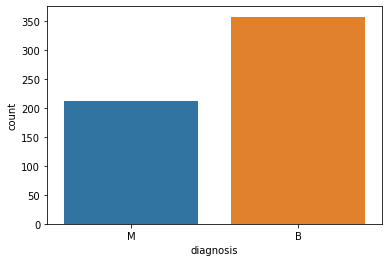

In [4]:
sns.countplot(data.diagnosis)

In [5]:
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder()
data.iloc[:, 0] = Y.fit_transform(data.iloc[:, 0].values)

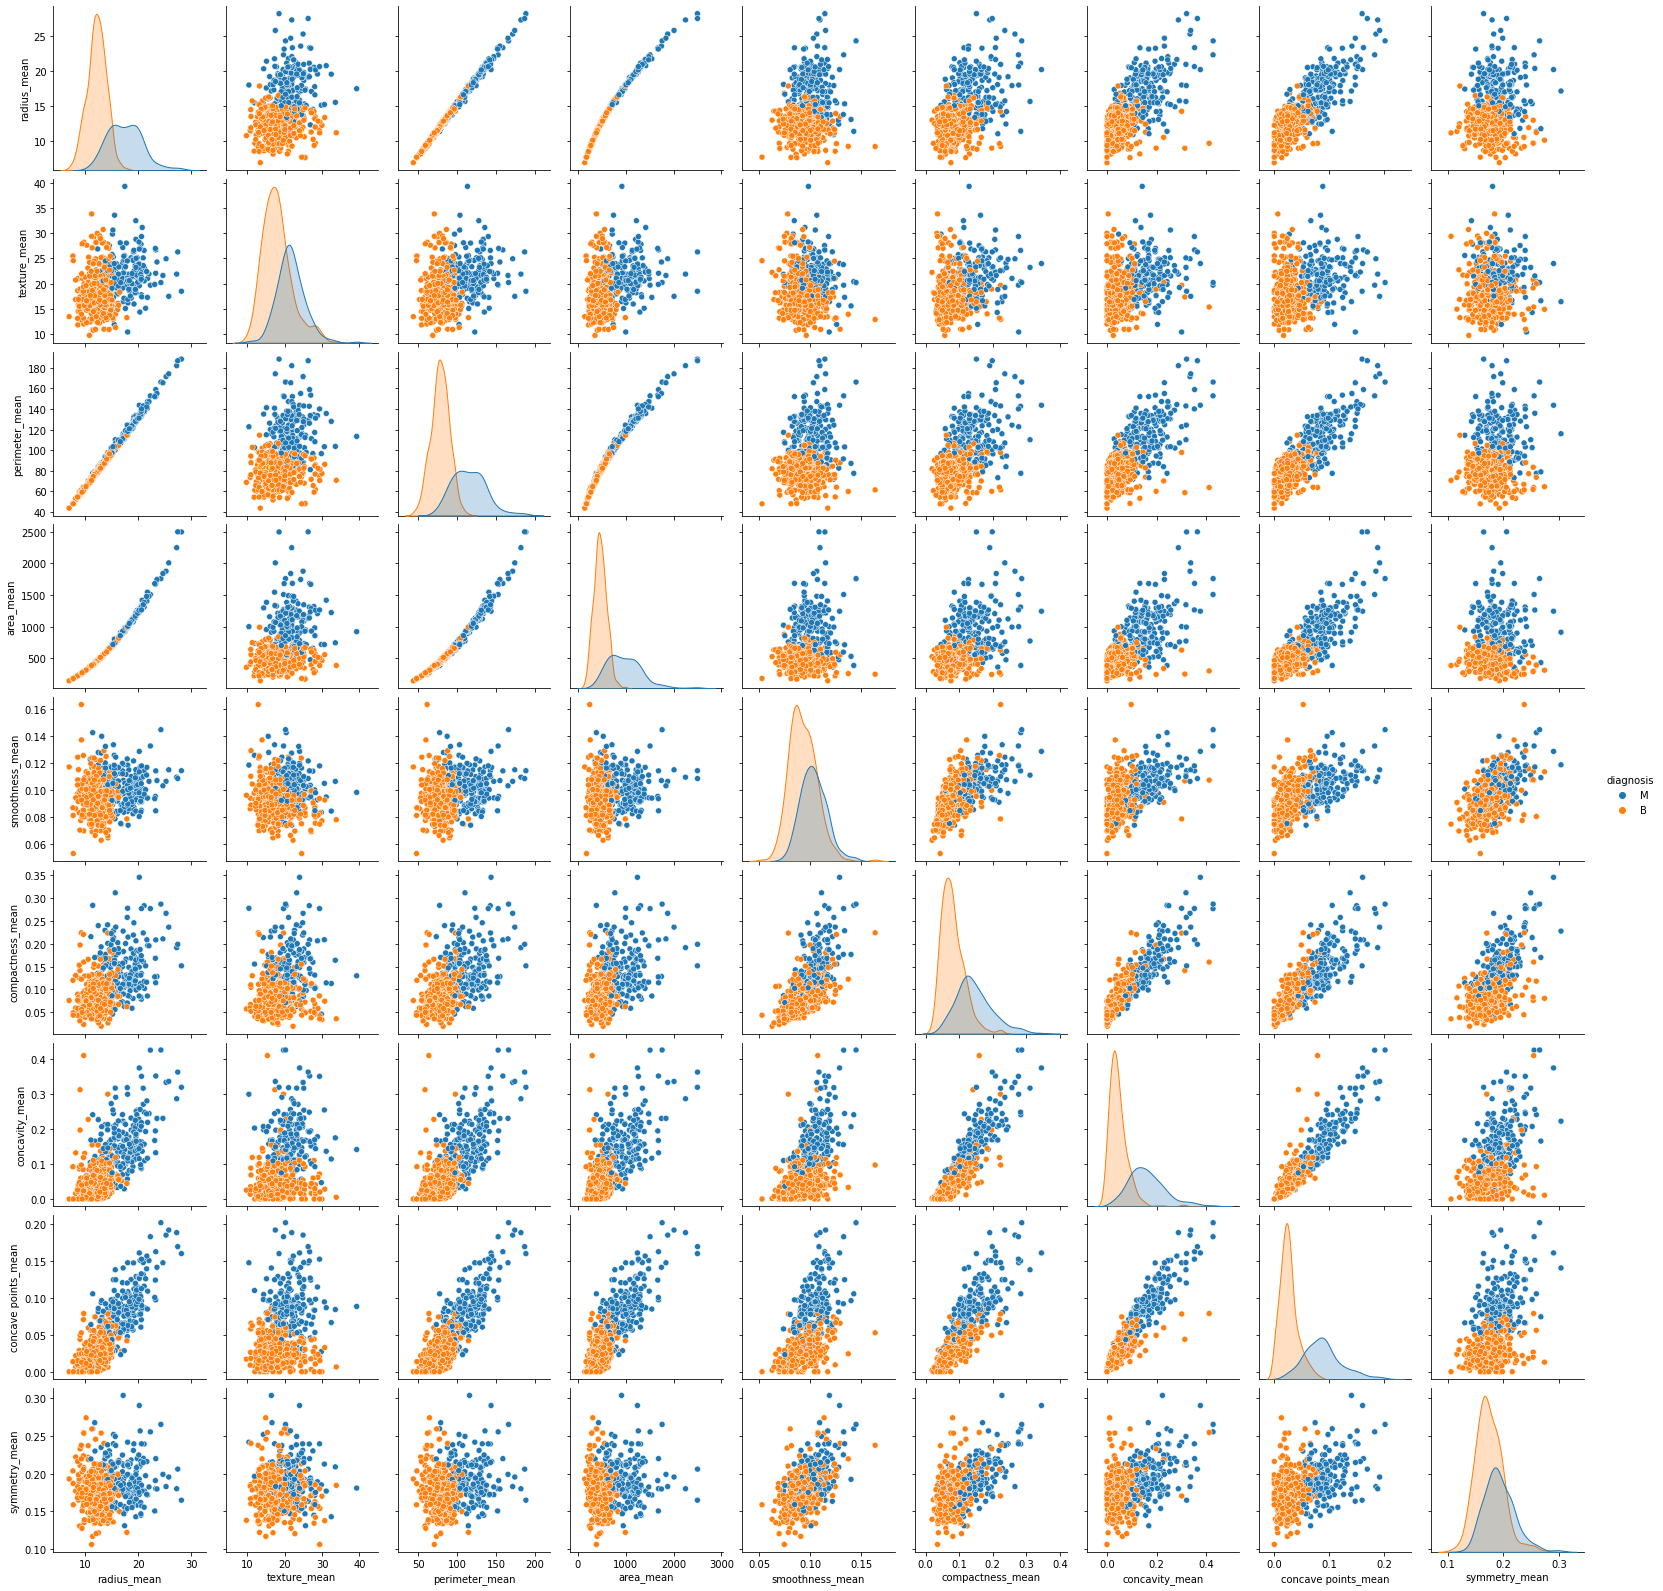

In [13]:
sns.pairplot(data, vars = data.iloc[:, 1:10], hue = 'diagnosis')

In [16]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<AxesSubplot:>

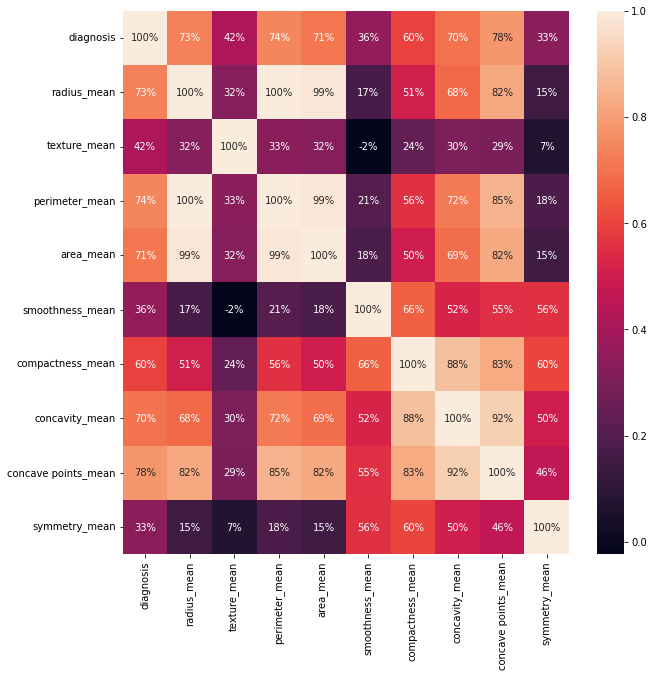

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(data.iloc[:, :10].corr(), annot=True, fmt='.0%')


In [15]:
X = data.drop(columns='diagnosis', axis = 1).copy()
y = data['diagnosis']
X.shape

(569, 30)

In [16]:
correlated_features = set()
correlation = X.corr()

In [17]:
for i in range(len(correlation.columns)):
    for j in range(i):
        if (abs(correlation.iloc[i, j]) > 0.9 and abs(correlation.iloc[i, j]) != 1):
            colname = correlation.columns[i]
            correlated_features.add(colname)            
        

In [18]:
correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [28]:
X = X.drop(columns=correlated_features, axis=1).copy()

In [29]:
X.shape

(569, 20)

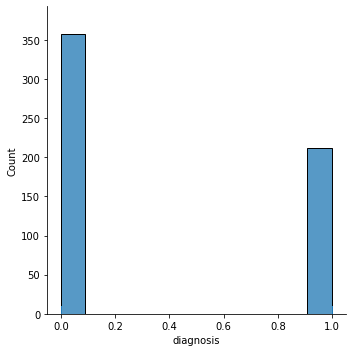

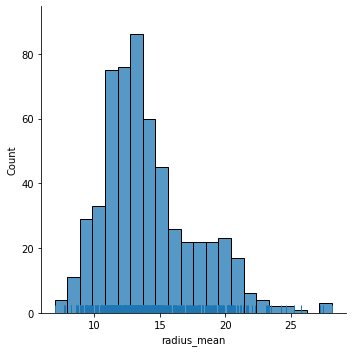

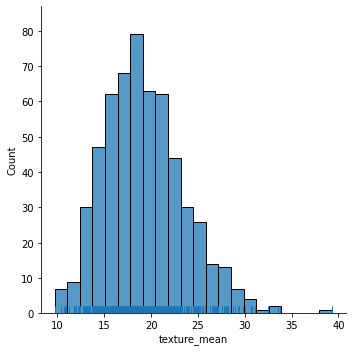

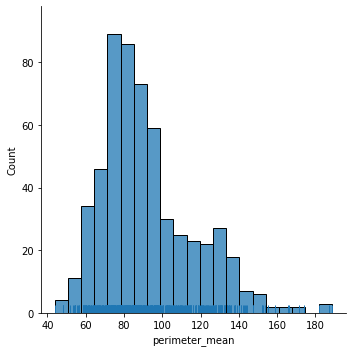

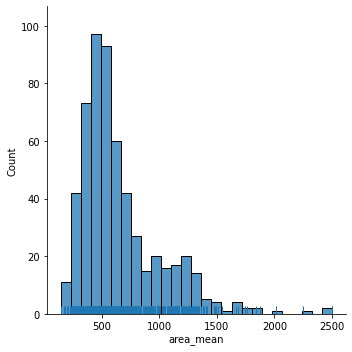

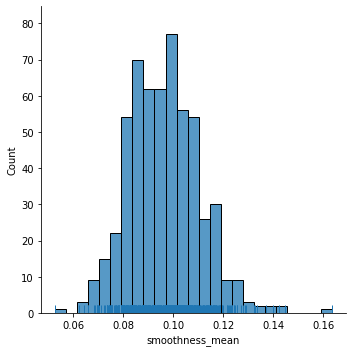

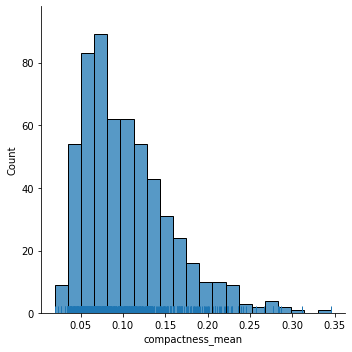

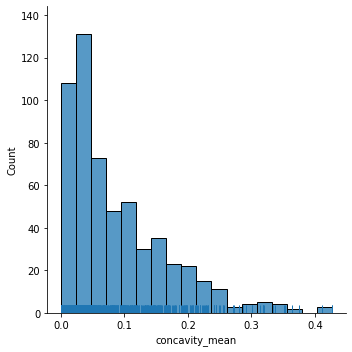

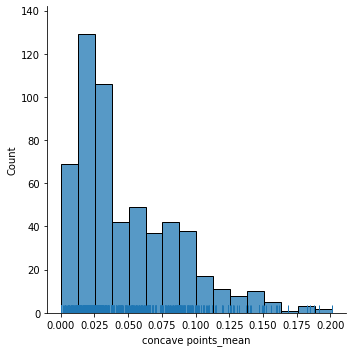

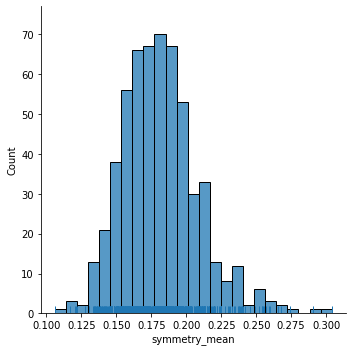

In [30]:
#disribuce dat
for column in data.columns[:10]:
    sns.displot(data[column], rug = True)
    plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline, make_pipeline
pipeline = make_pipeline(MinMaxScaler(), LocalOutlierFactor())


In [20]:
outliers = pipeline.fit_predict(data)==-1

In [21]:
data["outlier"] = pd.Series(outliers)


In [22]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  outlier  
0          0.4601                  0.11890    False  
1          0.2750                  0.08902    False  
2          0.3613                  0.08758    False  
3          0.6638                  0.17300     True  
4          0.2364                  0.07678    False  

[5 rows x 32 columns]

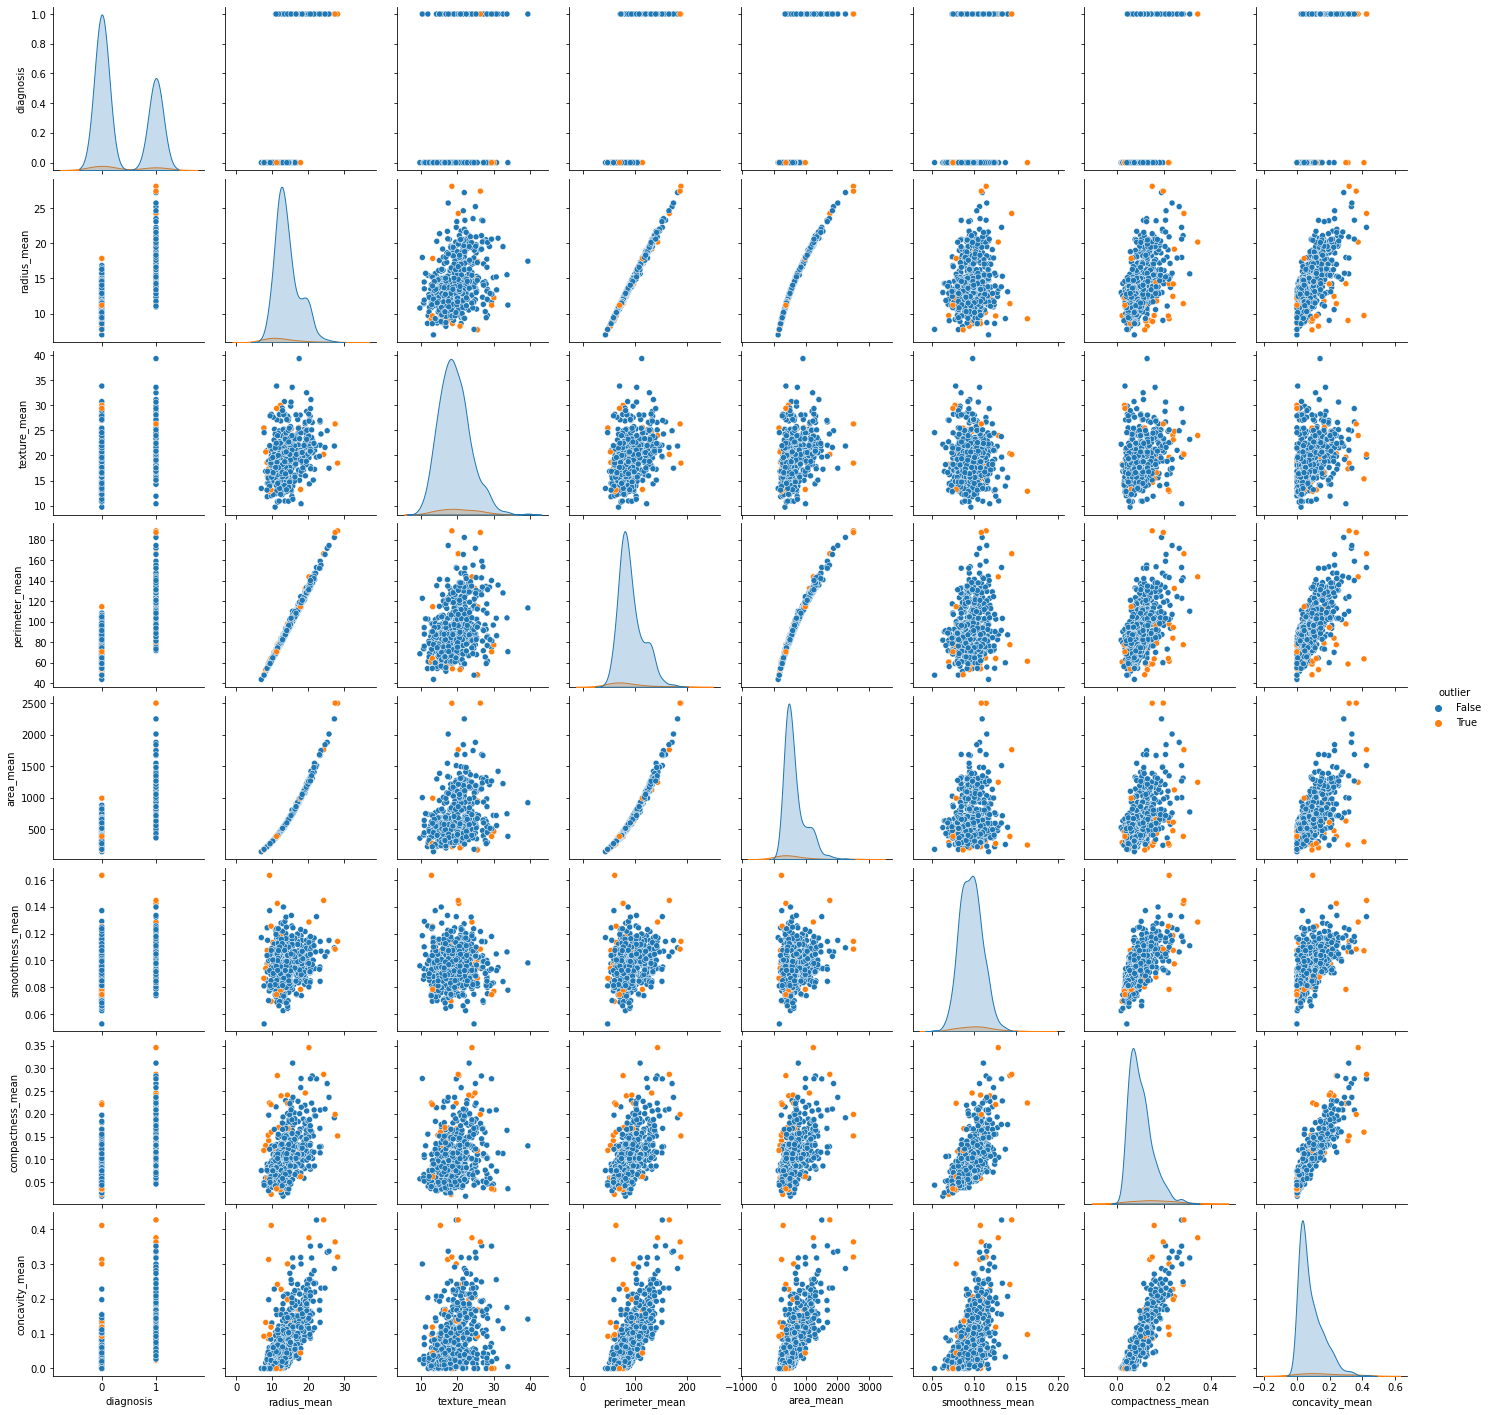

In [35]:

sns.pairplot(data, vars=data.iloc[:, :8],  hue = 'outlier')

In [39]:
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

X, y = data.drop(columns='diagnosis'), data['diagnosis']
X = MinMaxScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

"""X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)"""
X.shape

(569, 31)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

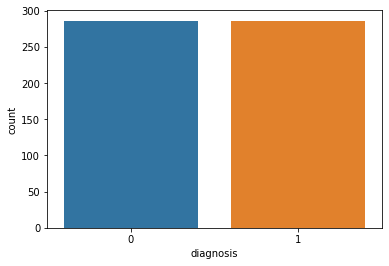

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=43, k_neighbors=30)
X_res, y_res = sm.fit_resample(X_train, y_train)


sns.countplot(y_res)

In [25]:
#GridSearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
range_depth = np.linspace(1, 12, 10, dtype='int')
grid_parameter = {'max_depth':range_depth}
DTC = DecisionTreeClassifier()

grid_clf = GridSearchCV(DTC, grid_parameter, scoring = 'f1', cv=10)
grid_clf.fit(X_train, y_train)
scores = grid_clf.cv_results_['mean_test_score']

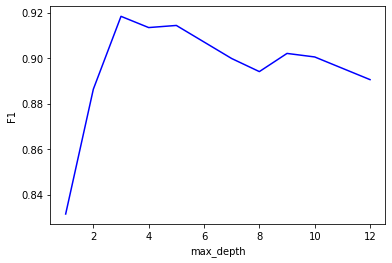

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range_depth, scores, 'b')

plt.xlabel('max_depth')
plt.ylabel('F1')
plt.show()

In [27]:
grid_parameters = {'max_depth':range_depth, 'min_samples_leaf':range_depth, 'criterion': ['gini', 'entropy']}
grid_clf = GridSearchCV(DTC, grid_parameters, scoring = 'f1', cv=10)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2}

In [28]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
dtc_pipeline = make_pipeline(DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, criterion = 'gini', random_state=0))
dtc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=9, min_samples_leaf=2,
                                        random_state=0))])

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, recall_score

pred = dtc_pipeline.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

f1_score(y_test, pred), recall_score(y_test, pred), dtc_pipeline.score(X_test, y_test)

(0.9411764705882352, 0.9302325581395349, 0.956140350877193)

In [30]:
confusion_matrix(y_test, pred)


array([[69,  2],
       [ 3, 40]], dtype=int64)

In [31]:
print(round(dtc_pipeline.score(X_test, y_test), 2))


0.96


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc_pipeline, X_train, y_train, cv=10)
scores.mean()

0.9495652173913044

In [33]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.9302325581395349

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score

RFC_pipeline = make_pipeline(RandomForestClassifier(max_depth=3))
RFC_pipeline.fit(X_res, y_res)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=3))])

In [35]:
pred = RFC_pipeline.predict(X_test)

print(round(RFC_pipeline.score(X_test, y_test), 2))
recall_score(y_test, pred)

0.98


1.0

In [36]:
f1_score(y_test, pred)

0.9772727272727273

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)

print(round(KNN.score(X_test, y_test), 2))
f1_score(y_test, pred)

0.96


0.9534883720930233

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
    max_depth=1, min_samples_leaf = 5,random_state=0).fit(X_res, y_res)
clf.score(X_test, y_test)
pred = clf.predict(X_test)
print(round(clf.score(X_train, y_train), 2))
Y = LabelEncoder()
pred_en = Y.fit_transform(pred)
y_en = Y.fit_transform(y_test)
print(round(clf.score(X_test, y_test), 2))
recall_score(y_en, pred_en)
f1_score(y_en, pred_en)

0.93
0.96


0.942528735632184